<a href="https://colab.research.google.com/github/hmtmherath85/Credit_Card_Fraud_Detection/blob/main/CreditC_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# uploading the csv file from GDrive 

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CreditC_Fraud_Detection/creditcard.csv") 

Mounted at /content/drive


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Descriptive Statistics

In [ ]:
# shape of the dataset
df.shape

(284807, 31)

In [ ]:
# data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# summary of the distriubtion of each attribute 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# class distribution. 1 if fraud 0 otherwise
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

'Class' is highly inbalanced.

# Exploratory Data Analysis

In [ ]:
# checking for null values
df.isnull().values.any()

False

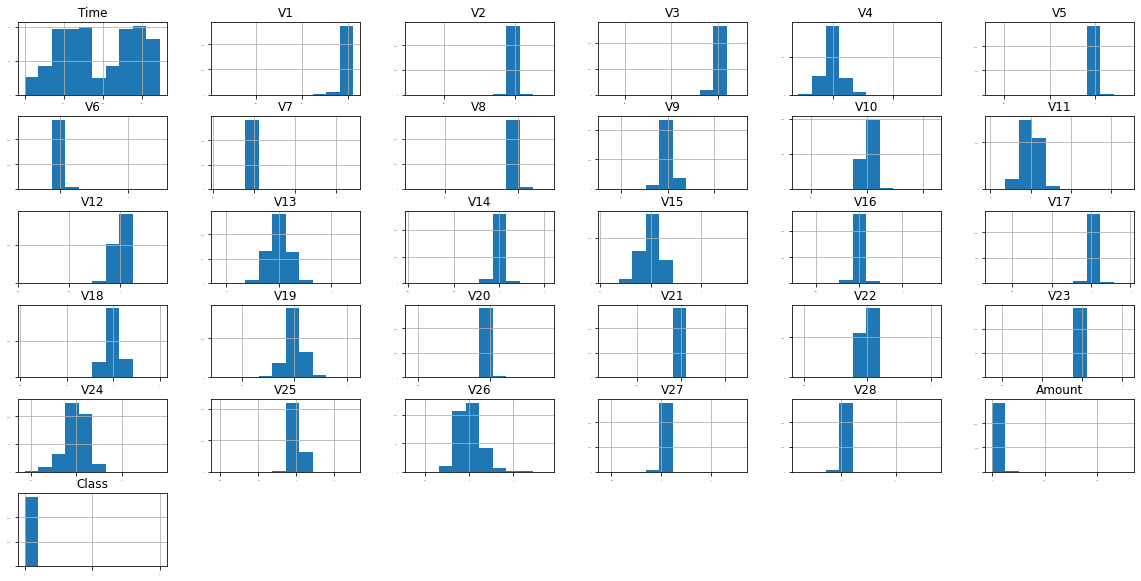

In [ ]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,figsize=(20, 10))
plt.show()

Some of the attributes Gaussian like and some looks like exponential. Also attributes have different ranges. We certainly need to standardize data. 

In [ ]:
# Let's check the skewness
skiv = df.skew()
print(skiv)

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


'Class', 'Amount', 'V28' and 'V8' are hightly skewed.

In [14]:
# removing the duplicate rows
df.drop_duplicates(keep=False,inplace=True)
df.shape

(282953, 31)

## Checking Correlations
If highly correlated variables present in the model, some models such as Linear and logistic perform poorly.

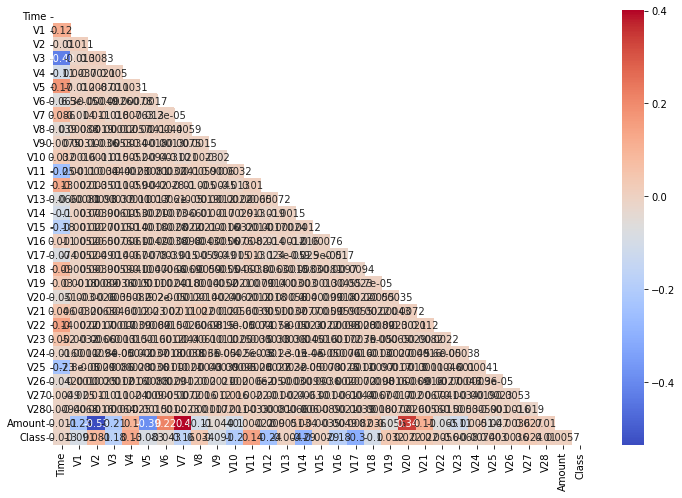

In [ ]:
mask = np.zeros_like(df.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True
plt.figure(figsize=[12, 8])
sns.heatmap(data=df.corr(method  = 'pearson'), mask=mask, annot=True, cmap='coolwarm')

The maximum correlation is around 0.4 which is not a high correlation at all. So we do not need to worry about corelation in this dataset.

# Data Split 

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore',category = FutureWarning)
warnings.filterwarnings('ignore',category = DeprecationWarning)


In [8]:
Y = df["Class"]
X = df.iloc[:, 1:29]

no_folds = 10
seed = 7
scoring = 'accuracy'

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = seed)


# The dataset has class imbalance issue and we need to treat it before proceeding. We do 'Oversampling' using SMOTE. We use only the train dataset to avoid the data leakage.

i.e. if we use test data, there are no original data to test our model. So we keep it aside as it is.

In [56]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, Y_resampled = SMOTE(random_state=2).fit_resample(X_train, Y_train)

print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

train_df = pd.concat([X_resampled,Y_resampled],axis=1)

# train_df = pd.DataFrame(X_resampled,Y_resampled,index=True)
print(train_df.shape)
train_df.head()

Resampled shape of X:  (452002, 28)
Resampled shape of Y:  (452002,)
Counter({0: 226001, 1: 226001})
(452002, 29)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-5.393729,-11.478169,-2.427140,3.550855,-4.793011,1.424504,3.510698,-0.675296,-0.456681,-1.084903,...,6.337720,1.573201,-2.446155,-2.836259,0.524355,-1.043801,-0.808406,-0.529013,0.634131,0
1,-0.856280,-3.263994,-1.045205,2.071847,-1.203204,0.243517,1.317762,-0.055492,0.105666,-0.279055,...,1.744203,0.640654,-0.498240,-1.011561,0.020798,0.257467,-0.349979,-0.193477,0.175047,0
2,-1.191388,1.998961,-0.953714,-1.033337,0.226949,-2.389648,1.514141,-0.284703,0.354676,0.758115,...,0.337639,0.172657,0.976402,-0.073223,0.953303,-0.244066,0.024505,0.523146,0.231805,0
3,-0.793390,1.253383,1.195130,0.021612,-0.345120,-0.958558,0.359703,0.348106,-0.600724,-0.545804,...,0.029946,-0.175489,-0.590608,0.043006,0.366460,-0.158921,0.072447,0.140477,0.051767,0
4,1.916051,-0.357298,-1.822575,0.236666,0.288556,-0.810425,0.454249,-0.277501,0.202131,0.229850,...,-0.082774,0.039018,0.107946,-0.027541,-0.333107,0.112493,0.673882,-0.123353,-0.079910,0


# Preparing a sample dataset for spot-checking the ML algorithms

In [57]:
sample_df = train_df.sample(int(len(train_df) * 0.2))
sample_df.shape

(90400, 29)

# Checking the histogram of one feature in the original dataset and the sample data set 

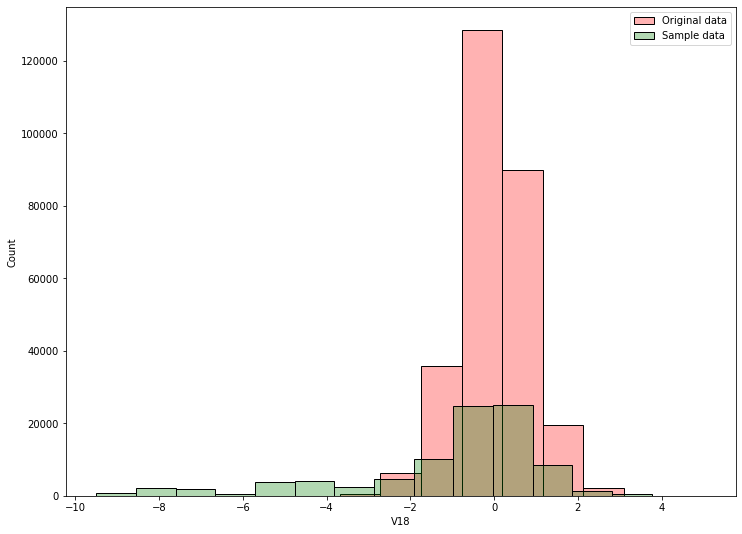

In [61]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(data=df, x="V18", label="Original data", color="red", alpha=0.3, bins=15)
sns.histplot(data=sample_df, x="V18", label="Sample data", color="green", alpha=0.3, bins=15)

plt.legend()
plt.show()

# Spot check on sample dataset using Logistic Regression, Support Vector Machine, KNN, Decision Trees, Random Forest, and Gradient Boosting with Standard Scaler and Pipeline

In [65]:
# Let's evaluate different algorithms which work on classification problem.
def model_dic():
  models = []

  # linear algorithms
  models.append(('LR',LogisticRegression(solver='liblinear')))

  # non-linear algorithms
  models.append(('SVC', SVC(gamma='auto')))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('DTree', DecisionTreeClassifier()))

  # Ensemble methods
  models.append(('RF',RandomForestClassifier()))
  models.append(('GBM',GradientBoostingClassifier()))

  return models


In [75]:
def pipeline_model_eval(models,X_train,Y_train):

  pipelines = []

  for i,j in models:
    pipelines.append(('Scaled'+ i,Pipeline([('Scaler', StandardScaler()),(i,j)])))

  print(pipelines)
  
  scaled_cross_vals = []
  scaled_model_names = []

  for name,model in pipelines:
      kfold = KFold(n_splits = no_folds, random_state = seed, shuffle = True)
      crosVal =cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
      scaled_cross_vals.append(crosVal)
      scaled_model_names.append(name)
      
      output = "%s : %f (%f) "%(name, crosVal.mean(), crosVal.std())
      print(output)

  return output

In [76]:
models = model_dic()
#print(models)

Ysample = sample_df["Class"]
Xsample = sample_df.iloc[:, 1:29]

#print(Xsample.shape)
result = pipeline_model_eval(models,Xsample,Ysample)

[('ScaledLR', Pipeline(steps=[('Scaler', StandardScaler()),
                ('LR', LogisticRegression(solver='liblinear'))])), ('ScaledSVC', Pipeline(steps=[('Scaler', StandardScaler()), ('SVC', SVC(gamma='auto'))])), ('ScaledKNN', Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])), ('ScaledDTree', Pipeline(steps=[('Scaler', StandardScaler()),
                ('DTree', DecisionTreeClassifier())])), ('ScaledRF', Pipeline(steps=[('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])), ('ScaledGBM', Pipeline(steps=[('Scaler', StandardScaler()),
                ('GBM', GradientBoostingClassifier())]))]
ScaledLR : 1.000000 (0.000000) 
ScaledSVC : 0.999978 (0.000044) 
ScaledKNN : 0.999701 (0.000185) 
ScaledDTree : 1.000000 (0.000000) 
ScaledRF : 1.000000 (0.000000) 
ScaledGBM : 1.000000 (0.000000) 


We choose 'KNN' and 'Random Forest' algorithm to check on the original dataset.

# The score of 'RF' is slightly higher than 'KNN'. But 'KNN' has the lowest variation. Also it takes less CPU time than 'RF'.  So we choose 'KNN' to finalize the modeling. 


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predict = dtc.predict(X_test)
  
# print classification report
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.80      0.79      0.79       100

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
prediction_lr = lr.predict(X_test)
  
# print classification report
print(classification_report(Y_test, prediction_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.86      0.57      0.69       100

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
prediction_gbc = gbc.predict(X_test)
  
# print classification report
print(classification_report(Y_test, prediction_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.78      0.68      0.73       100

    accuracy                           1.00     56962
   macro avg       0.89      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
prediction_rfc = rfc.predict(X_test)
  
# print classification report
print(classification_report(Y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.81      0.87       100

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
cm_rfc = confusion_matrix(Y_test,prediction_rfc)
print(cm_rfc)

[[56857     5]
 [   19    81]]


In [20]:
print(accuracy_score(Y_test,prediction_rfc))

0.9995786664794073
